# How SVM Kernels Shape the Decision Boundary: A Visual Tutorial

**Author:** Riyanka Dhar<br>
**Student ID:** 23096051<br>
**Individual Assignment: Machine Learning Tutorial** 
 
This notebook accompanies my PDF tutorial for the assignment.  
Its purpose is to demonstrate, through runnable code and clear visualisations, how different Support Vector Machine (SVM) kernels influence the decision boundary on a non-linear dataset.

In this notebook, I will:
- Generate a 2D non-linear dataset using `make_moons`
- Fit SVM classifiers with different kernels (linear, polynomial, RBF)
- Visualise the decision boundaries, margins, and support vectors
- Examine how hyperparameters **C** and **gamma** affect model flexibility
- Optionally apply the RBF kernel to a custom synthetic dataset

This notebook produces all figures used in the PDF submission.


In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

# Machine learning
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Plot settings (colour-blind friendly where possible)
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 12

# Directory for saving figures
import os

FIGURES_DIR = "figures"
os.makedirs(FIGURES_DIR, exist_ok=True)

print("Setup complete. Figures will be saved to:", FIGURES_DIR)


Setup complete. Figures will be saved to: figures


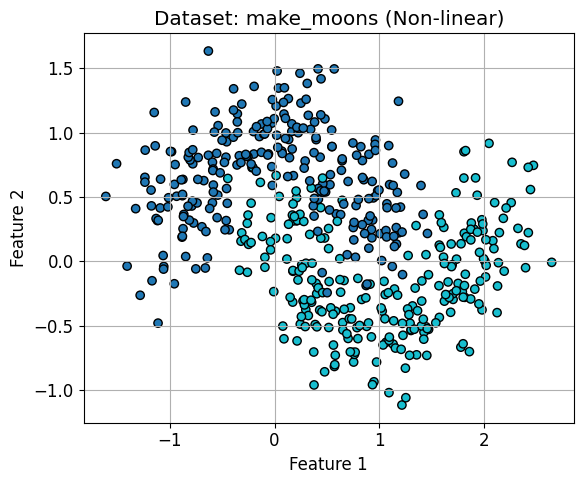

Dataset generated and figure saved to: figures/fig1_dataset.png


In [2]:
# Generate the dataset
X, y = make_moons(n_samples=500, noise=0.25, random_state=RANDOM_STATE)

# Visualise
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', edgecolor='k')
plt.title("Dataset: make_moons (Non-linear)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()

# Save figure
fig_path = f"{FIGURES_DIR}/fig1_dataset.png"
plt.savefig(fig_path, dpi=120)
plt.show()

print("Dataset generated and figure saved to:", fig_path)


In [4]:
def plot_svm_decision_boundary(clf, X, y, title, fig_name):
    # Create a mesh over the feature space
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    
    # Predict over mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab10")

    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", edgecolor="k")

    # Highlight support vectors
    if hasattr(clf, "support_vectors_"):
        plt.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=80,
            facecolors="none",
            edgecolors="k",
            linewidths=1.5,
            label="Support vectors",
        )

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="best")
    plt.tight_layout()

    path = f"{FIGURES_DIR}/{fig_name}"
    plt.savefig(path, dpi=120)
    plt.show()

    print(f"Figure saved to: {path}")


Linear SVM training accuracy: 0.846


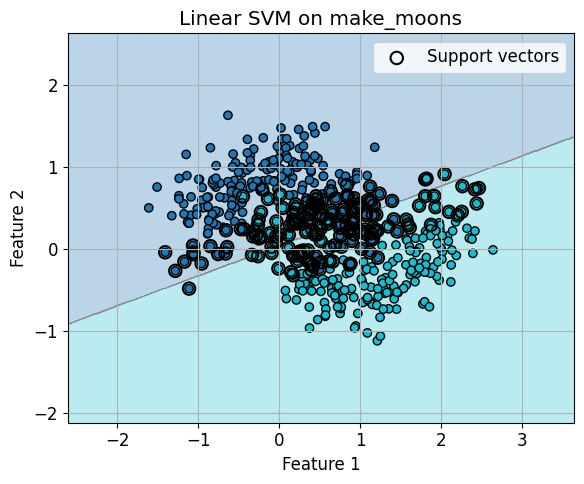

Figure saved to: figures/fig2_linear_svm.png


In [5]:
# Train linear SVM
linear_clf = SVC(kernel="linear", C=1.0, random_state=RANDOM_STATE)
linear_clf.fit(X, y)

# Evaluate on the training data (for reference)
y_pred_linear = linear_clf.predict(X)
acc_linear = accuracy_score(y, y_pred_linear)
print(f"Linear SVM training accuracy: {acc_linear:.3f}")

# Plot decision boundary, margins, and support vectors
plot_svm_decision_boundary(
    clf=linear_clf,
    X=X,
    y=y,
    title="Linear SVM on make_moons",
    fig_name="fig2_linear_svm.png",
)


Polynomial (degree=3) SVM training accuracy: 0.868


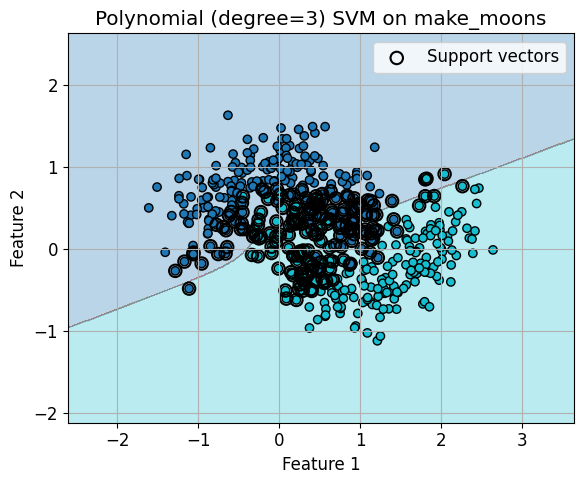

Figure saved to: figures/fig3_poly_svm_deg3.png


In [6]:
# Train polynomial SVM (degree = 3)
poly_clf = SVC(kernel="poly", degree=3, C=1.0, gamma="scale", random_state=RANDOM_STATE)
poly_clf.fit(X, y)

# Evaluate on the training data
y_pred_poly = poly_clf.predict(X)
acc_poly = accuracy_score(y, y_pred_poly)
print(f"Polynomial (degree=3) SVM training accuracy: {acc_poly:.3f}")

# Plot decision boundary and support vectors
plot_svm_decision_boundary(
    clf=poly_clf,
    X=X,
    y=y,
    title="Polynomial (degree=3) SVM on make_moons",
    fig_name="fig3_poly_svm_deg3.png",
)


RBF SVM training accuracy: 0.950


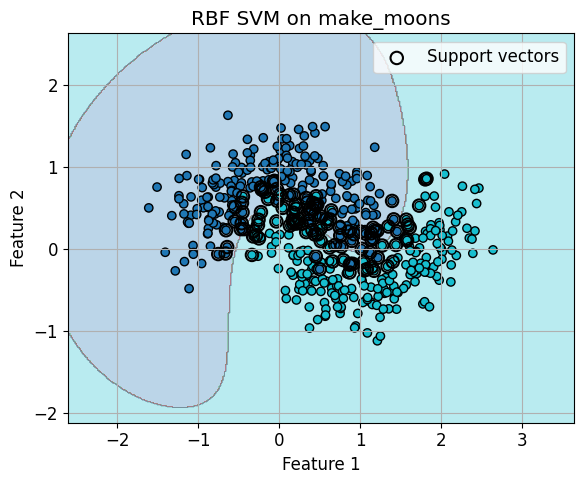

Figure saved to: figures/fig4_rbf_svm.png


In [7]:
# Train RBF SVM
rbf_clf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=RANDOM_STATE)
rbf_clf.fit(X, y)

# Evaluate on the training data
y_pred_rbf = rbf_clf.predict(X)
acc_rbf = accuracy_score(y, y_pred_rbf)
print(f"RBF SVM training accuracy: {acc_rbf:.3f}")

# Plot decision boundary and support vectors
plot_svm_decision_boundary(
    clf=rbf_clf,
    X=X,
    y=y,
    title="RBF SVM on make_moons",
    fig_name="fig4_rbf_svm.png",
)


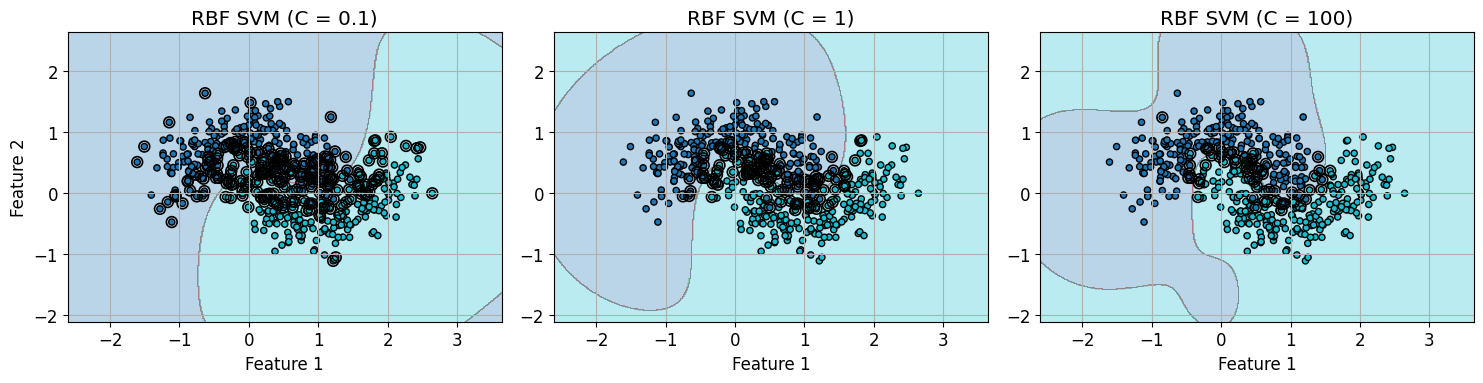

Figure saved to: figures/fig5_rbf_C_values.png


In [8]:
def plot_rbf_for_C_values(X, y, C_values, gamma="scale"):
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    plt.figure(figsize=(15, 4))

    for i, C in enumerate(C_values, start=1):
        clf = SVC(kernel="rbf", C=C, gamma=gamma, random_state=RANDOM_STATE)
        clf.fit(X, y)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(1, 3, i)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab10")
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", edgecolor="k", s=20)

        # support vectors
        plt.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=60,
            facecolors="none",
            edgecolors="k",
            linewidths=1.2,
        )

        plt.title(f"RBF SVM (C = {C})")
        plt.xlabel("Feature 1")
        if i == 1:
            plt.ylabel("Feature 2")

    plt.tight_layout()
    path = f"{FIGURES_DIR}/fig5_rbf_C_values.png"
    plt.savefig(path, dpi=120)
    plt.show()

    print(f"Figure saved to: {path}")


# Run for C = 0.1, 1, 100
C_values = [0.1, 1, 100]
plot_rbf_for_C_values(X, y, C_values)


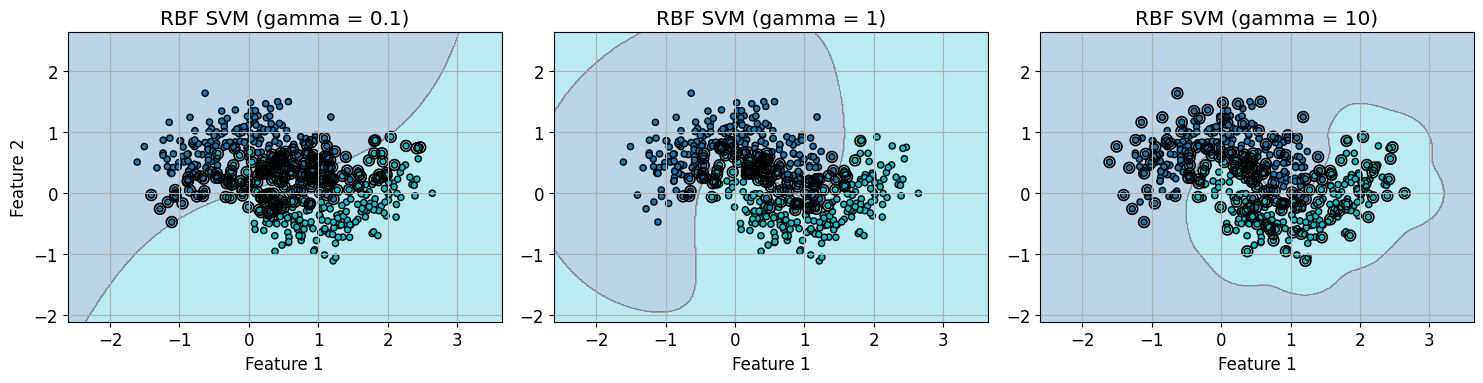

Figure saved to: figures/fig6_rbf_gamma_values.png


In [9]:
def plot_rbf_for_gamma_values(X, y, gamma_values, C=1.0):
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    plt.figure(figsize=(15, 4))

    for i, gamma in enumerate(gamma_values, start=1):
        clf = SVC(kernel="rbf", C=C, gamma=gamma, random_state=RANDOM_STATE)
        clf.fit(X, y)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(1, 3, i)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab10")
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", edgecolor="k", s=20)

        # support vectors
        plt.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=60,
            facecolors="none",
            edgecolors="k",
            linewidths=1.2,
        )

        plt.title(f"RBF SVM (gamma = {gamma})")
        plt.xlabel("Feature 1")
        if i == 1:
            plt.ylabel("Feature 2")

    plt.tight_layout()
    path = f"{FIGURES_DIR}/fig6_rbf_gamma_values.png"
    plt.savefig(path, dpi=120)
    plt.show()

    print(f"Figure saved to: {path}")


# Run for gamma = 0.1, 1, 10
gamma_values = [0.1, 1, 10]
plot_rbf_for_gamma_values(X, y, gamma_values)


RBF SVM on spiral dataset - training accuracy: 0.994


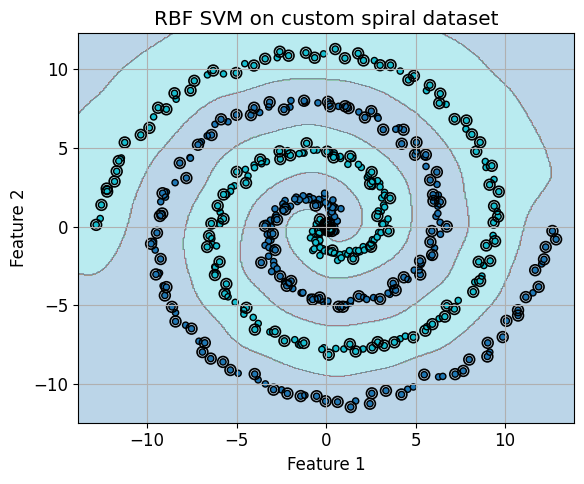

Figure saved to: figures/fig7_rbf_spiral_custom.png


In [10]:
def make_spiral(n_points_per_class=250, noise=0.2, random_state=RANDOM_STATE):
    rng = np.random.RandomState(random_state)

    n = n_points_per_class
    theta = np.linspace(0, 4 * np.pi, n)

    # Class 0 spiral
    r0 = theta
    x0 = r0 * np.cos(theta) + noise * rng.randn(n)
    y0 = r0 * np.sin(theta) + noise * rng.randn(n)

    # Class 1 spiral (phase-shifted)
    r1 = theta
    x1 = -r1 * np.cos(theta) + noise * rng.randn(n)
    y1 = -r1 * np.sin(theta) + noise * rng.randn(n)

    X0 = np.column_stack((x0, y0))
    X1 = np.column_stack((x1, y1))

    X_spiral = np.vstack((X0, X1))
    y_spiral = np.hstack((np.zeros(n, dtype=int), np.ones(n, dtype=int)))

    return X_spiral, y_spiral


# Generate custom spiral dataset
X_spiral, y_spiral = make_spiral()

# Fit RBF SVM on spiral data
rbf_spiral_clf = SVC(kernel="rbf", C=10.0, gamma=0.5, random_state=RANDOM_STATE)
rbf_spiral_clf.fit(X_spiral, y_spiral)

# Evaluate on spiral dataset
y_spiral_pred = rbf_spiral_clf.predict(X_spiral)
acc_spiral = accuracy_score(y_spiral, y_spiral_pred)
print(f"RBF SVM on spiral dataset - training accuracy: {acc_spiral:.3f}")


# Plot decision boundary for spiral dataset
def plot_spiral_decision_boundary(clf, X, y, title, fig_name):
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab10")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", edgecolor="k", s=20)

    # support vectors
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=60,
        facecolors="none",
        edgecolors="k",
        linewidths=1.2,
    )

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()

    path = f"{FIGURES_DIR}/{fig_name}"
    plt.savefig(path, dpi=120)
    plt.show()

    print(f"Figure saved to: {path}")


plot_spiral_decision_boundary(
    clf=rbf_spiral_clf,
    X=X_spiral,
    y=y_spiral,
    title="RBF SVM on custom spiral dataset",
    fig_name="fig7_rbf_spiral_custom.png",
)


In [11]:
print("Summary of SVM Training Accuracies on make_moons")
print("------------------------------------------------")
print(f"Linear SVM:      {acc_linear:.3f}")
print(f"Polynomial SVM:  {acc_poly:.3f}")
print(f"RBF SVM:         {acc_rbf:.3f}")

print("\nSummary for Custom Spiral Dataset")
print("---------------------------------")
print(f"RBF SVM (spiral): {acc_spiral:.3f}")


Summary of SVM Training Accuracies on make_moons
------------------------------------------------
Linear SVM:      0.846
Polynomial SVM:  0.868
RBF SVM:         0.950

Summary for Custom Spiral Dataset
---------------------------------
RBF SVM (spiral): 0.994
